In [1]:
# TODO: 1. 랜덤 입력 값 작성(배치 1, 32x32, 채널 3)
# TODO: 2. Conv2D, MaxPool2D, Dense 파라미터 LeNet-5 모델에 맞게
# TODO: 3. 하나 돌리고 shaphe 출력하면서 흐름 파악
# 심화1) keras.datasets에서 제공하는 mnist 적용
# 심화2) 옵티마이저와 로스 설정하여 실제 모델 학습
# 심화3) 학습한 모델 성능 확인하기 위해 evaluate
# 심화4) 정확도 및 loss 그래프로 나타내기

![image](https://user-images.githubusercontent.com/47033052/109135835-db216580-779a-11eb-9e8f-7db4fef02fe5.png)


In [1]:
# prefix
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# mnist
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
rows, cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows, cols, 1)

In [4]:
# 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# one-hot 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# 모델 구현
# 컨볼루션
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6,
                                kernel_size=(5,5),
                                strides=(1,1),
                                activation='tanh',
                                input_shape=input_shape))

In [6]:
# SupSampling
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                          strides=(2,2)))

In [7]:
# 컨볼루션
model.add(tf.keras.layers.Conv2D(filters=16,
                                kernel_size=(5,5),
                                strides=(1,1),
                                activation='tanh'))

In [8]:
# SupSampling
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                          strides=(2,2)))

In [9]:
# 펼치기
model.add(tf.keras.layers.Flatten())

# dense
model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

In [10]:
# 펼치기
model.add(tf.keras.layers.Flatten())

# dense
model.add(tf.keras.layers.Dense(units=84, activation='tanh'))                                                                                                                                   

In [11]:
# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1, 
                                                                                 momentum=0.0, 
                                                                                 decay=0.0),
             metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0

In [12]:
hist = model.fit(x_train, y_train, batch_size=256, epochs=10, verbose=1)

Epoch 1/10
235/235 [==============================] - 6s 26ms/step - loss: 0.9525 - accuracy: 0.7281
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.2698 - accuracy: 0.9217
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1894 - accuracy: 0.9445
Epoch 4/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1445 - accuracy: 0.9576
Epoch 5/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1145 - accuracy: 0.9665
Epoch 6/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0966 - accuracy: 0.9707
Epoch 7/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0879 - accuracy: 0.9739
Epoch 8/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0754 - accuracy: 0.9779
Epoch 9/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0682 - accuracy: 0.9801
Epoch 10/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0616 - accura

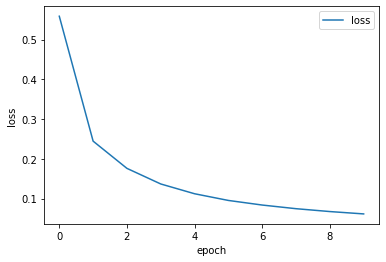

In [21]:
# loss 그래프 그리기
plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'])
plt.show()

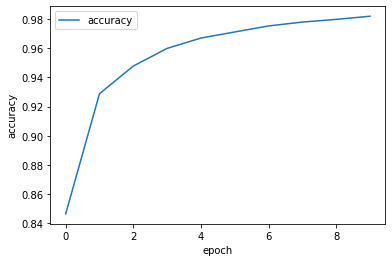

In [22]:
# 정확도 그래프 그리기
plt.plot(hist.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()